In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv("drug_safety.csv")

In [3]:
df.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


In [5]:
# Convert 'adverse_effects' column to binary (1 = Yes, 0 = No)
df['adverse_effects'] = df['adverse_effects'].apply(lambda x: 1 if x == "Yes" else 0)


In [6]:
# Separate Drug and Placebo groups
drug_group = df[df['trx'] == 'Drug']
placebo_group = df[df['trx'] == 'Placebo']

In [7]:

# Count the number of participants with adverse effects in each group
drug_adverse_count = drug_group['adverse_effects'].sum()
placebo_adverse_count = placebo_group['adverse_effects'].sum()


In [9]:
# Total number of participants in each group
drug_total = len(drug_group)
placebo_total = len(placebo_group)

In [13]:
# Perform Two-Proportion Z-Test
count = np.array([drug_adverse_count, placebo_adverse_count])  # Number of adverse effects
nobs = np.array([drug_total, placebo_total])  # Total participants
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')


In [14]:
print(z_stat)

0.0452182684494942


In [15]:
print(p_value)

0.9639333330262475


In [17]:
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in adverse effects between the drug and placebo groups.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). No strong evidence of a difference in adverse effects between the groups.")



Conclusion: Fail to reject the null hypothesis (H₀). No strong evidence of a difference in adverse effects between the groups.


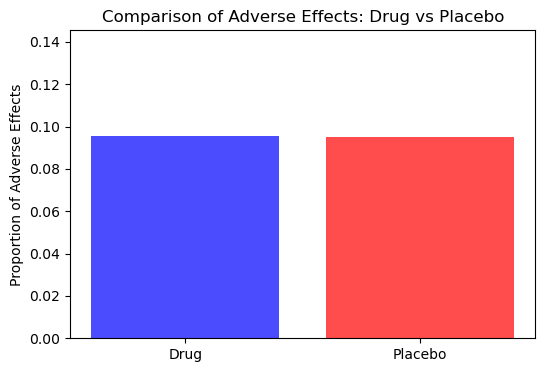

In [20]:
# Visualization
import matplotlib.pyplot as plt
labels = ['Drug', 'Placebo']
adverse_effects_proportions = [drug_adverse_count / drug_total, placebo_adverse_count / placebo_total]

plt.figure(figsize=(6, 4))
plt.bar(labels, adverse_effects_proportions, color=['blue', 'red'], alpha=0.7)
plt.ylabel("Proportion of Adverse Effects")
plt.title("Comparison of Adverse Effects: Drug vs Placebo")
plt.ylim(0, max(adverse_effects_proportions) + 0.05)
plt.show()

In [27]:
# Chi-square test for independence
import scipy.stats as stats
contingency_table = pd.crosstab(df["num_effects"], df["trx"])

# Perform Chi-square test for independence
chi2_stat, p_value1, dof, expected = stats.chi2_contingency(contingency_table)

print(p_value1)
# Interpretation
if p_value1 < 0.05:
    print("Conclusion: There is a significant association between treatment and adverse effects.")
else:
    print("Conclusion: There is no significant association between treatment and adverse effects.")

0.6150123339426765
Conclusion: There is no significant association between treatment and adverse effects.


In [25]:
#t-Test
from scipy.stats import ttest_ind
# Separate the ages for Drug and Placebo groups
drug_ages = df[df['trx'] == 'Drug']['age']
placebo_ages = df[df['trx'] == 'Placebo']['age']

# Perform an independent t-test
t_stat, age_p_value = ttest_ind(drug_ages, placebo_ages, equal_var=False)  # Welch's t-test

# Output the p-value
print(f"P-value for Age Difference: {age_p_value}")

P-value for Age Difference: 0.1403138130413439
